In [1]:
import pandas as pd 
pd.set_option("display.max_colwidth", 200)

In [2]:
data = pd.read_csv('tweets.csv')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [3]:
# refers to positive sentiment, 1 is negative sentiment

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [5]:
# drop the id column
data.drop(['id'], axis=1, inplace=True)
data.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [6]:
#check for the class balance
data['label'].value_counts(normalize=True)

0    0.744192
1    0.255808
Name: label, dtype: float64

<Axes: >

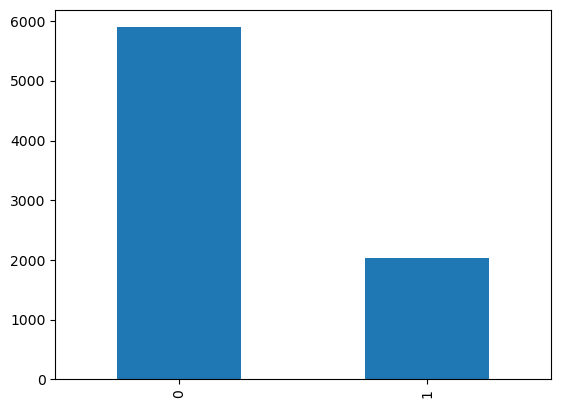

In [7]:
#plot the label counts
data['label'].value_counts().plot(kind='bar')

## Data Cleaning

In [8]:
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [9]:
import re

In [10]:
# Substitute 's with "is"
re.sub(r"'s\b", " is", data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [11]:
# Removing the user mentions
data['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [12]:
# We'll retain on the alphabets & digits
re.sub("@[A-Za-z0-9]+", "", data['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade'

In [13]:
#remove the hashtags
data['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [14]:
re.sub("#", "", data['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [15]:
#Removing the hyperlinks
re.sub(r"http\S+", "", data['tweet'][0])

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [16]:
# Retain on the alphabets (get rid of punctuations, special char, digits)
data['tweet'][25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [17]:
re.sub(r"[^a-zA-Z]", " ", data['tweet'][0])

' fingerprint  Pregnancy Test https   goo gl h MfQV  android  apps  beautiful  cute  health  igers  iphoneonly  iphonesia  iphone'

In [18]:
import nltk


In [19]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# Stop words Removel
import nltk
from nltk.corpus import stopwords

In [21]:
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'to', 'ours', "isn't", 'ma', "didn't", 'under', "she's", 'because', 'didn', "couldn't", 'they', 'needn', 'was', 'wasn', 'there', 'you', 'ain', 'these', 'haven', 'into', 'isn', 'other', 'm', 'am', "should've", 'our', "that'll", 're', 'him', 'their', "hadn't", 'at', "weren't", 'only', 'some', 'hers', 'then', 'while', 'but', 'hasn', 'same', 'ourselves', 'doing', 'this', 'if', "mustn't", 'such', 'doesn', 'too', 'where', "doesn't", 'having', 'all', "haven't", 'has', 'myself', 've', 'y', 'against', 'on', 'her', "mightn't", 'now', 'she', 'whom', 'those', 'after', 'through', 'each', 'than', 't', 'your', 'himself', 'do', 'or', 'here', 'itself', 'for', 'yourselves', 'does', 'herself', 'its', 'don', "shan't", 'in', "needn't", 'wouldn', 'nor', 'out', 'it', 'not', 'few', 'when', "aren't", 'did', 'off', 'so', 'with', 'themselves', 'won', 'about', 'should', 'more', 'are', 'an', 'before', 'were', 'any', 'as', 'shouldn', 'them', 'his', 'up', 'is', 'most', 'yours', 'above', 'why', 'just', "you'd", "it'

In [22]:
len(nltk_stopwords)

179

In [23]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
sklearn_stopwords

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'con',
 'could',
 'couldnt',
 'cry',
 'de',
 'describe',
 'detail',
 'do',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'etc',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'fill',
 'find',
 'fire',
 'first',
 'five',
 'for'

In [24]:
len(sklearn_stopwords)

318

In [25]:
#find the common stpwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'to', 'ours', 'under', 'because', 'they', 'was', 'there', 'you', 'these', 'into', 'other', 'am', 're', 'our', 'him', 'their', 'at', 'only', 'some', 'hers', 'then', 'while', 'but', 'same', 'ourselves', 'this', 'if', 'such', 'too', 'where', 'all', 'has', 'myself', 'against', 'on', 'her', 'now', 'she', 'whom', 'those', 'after', 'through', 'each', 'than', 'your', 'himself', 'do', 'or', 'here', 'itself', 'for', 'yourselves', 'herself', 'its', 'in', 'nor', 'out', 'it', 'not', 'few', 'when', 'off', 'so', 'with', 'themselves', 'about', 'should', 'more', 'are', 'an', 'before', 'were', 'any', 'as', 'them', 'his', 'up', 'is', 'most', 'yours', 'above', 'why', 'no', 'he', 'of', 'be', 'and', 'what', 'a', 'further', 'over', 'both', 'being', 'me', 'from', 'below', 'once', 'who', 'can', 'will', 'between', 'my', 'how', 'very', 'own', 'had', 'by', 'which', 'have', 'down', 'again', 'until', 'yourself', 'we', 'that', 'the', 'been', 'i', 'during'}


In [26]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [27]:
#combining the stopwords from sklearn & NLTK'
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [28]:
import nltk

# Download the WordNet resource
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
# Text Normalize: Steming or lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [30]:
len(combined_stopwords)

378

In [31]:
data['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [32]:
import nltk

# Download the missing resource
nltk.download('omw-1.4')

# Now, you should be able to use the resource without errors


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [33]:
new_sent = ''
for token in data['tweet'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '

new_sent

'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [34]:
import contractions

In [35]:
stopwords

<WordListCorpusReader in 'C:\\Users\\pc\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [36]:
import contractions 
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [37]:
contractions.fix(data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

### Define the Cleaner Function

In [ ]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub()